## Project 8
By Olivia Rigatti

## Part 2: Analyzing timestamp data for patterns

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df_bernie = pd.read_csv('bernie_timestamps.csv')

In [4]:
type(df_bernie['Date Played'][0])

numpy.int64

In [5]:
# Creates new column with data in datetime format now
df_bernie['Timestamp'] = pd.to_datetime(df_bernie['Date Played'], format = '%Y%m%d')

In [6]:
# Examines new columns
df_bernie.head()

,Unnamed: 0,Date Played,Timestamp
0,0,20200726,2020-07-26
1,1,20200726,2020-07-26
2,2,20200726,2020-07-26
3,3,20200726,2020-07-26
4,4,20200726,2020-07-26


The data appears to already be sorted in descending order, but just to make sure it is (for the next part of the project) the code below sorts the Date Time column in descending order. 

In [7]:
# Sorts values in ascending order
df_bernie['Timestamp'].sort_values()

0       2020-07-26
106     2020-07-26
107     2020-07-26
108     2020-07-26
109     2020-07-26
           ...    
63901   2023-10-21
63902   2023-10-21
63903   2023-10-21
63896   2023-10-21
63923   2023-10-21
Name: Timestamp, Length: 63924, dtype: datetime64[ns]

No we want to make a new column that tells us the time since between a timestamp and the previous one. 

In [8]:
# Creates new column that tells us the time since the previous timestamp
df_bernie['Difference'] = df_bernie['Timestamp'].diff()

In [9]:
# Displays the dataframe so we can see the new column
df_bernie.head()

,Unnamed: 0,Date Played,Timestamp,Difference
0,0,20200726,2020-07-26,NaT
1,1,20200726,2020-07-26,0 days
2,2,20200726,2020-07-26,0 days
3,3,20200726,2020-07-26,0 days
4,4,20200726,2020-07-26,0 days


For question 3 of this part of the project we want to find the longest time between timestamps and the average time between timestamps.

In [10]:
# Finds the maximum time between timestamps  
diff_max = df_bernie['Difference'].max()

# Prints the result
print(diff_max)

5 days 00:00:00


In [11]:
# Finds the average time between timestamps
diff_mean = df_bernie['Difference'].mean()

# Prints the result
print(diff_mean)

0 days 00:26:37.622139136


From the results above we can see that the maximum time between timestamps is five days. We can also see that the average time between time stamps is zero days. 

Now we want to find the day with the most timestamps and how many events occureed on that day. We also want to find the month with the most events and how many events were in that month. Because my timestamp data does not include hour that the event occurred I can just look at the value counts of the timestamp and see what has the most occurences to get the day with the most timestamps. 

In [12]:
# Counts values for the timestamps
df_bernie['Timestamp'].value_counts()

2020-10-14    400
2021-09-09    349
2020-12-05    328
2020-09-27    297
2021-08-13    271
             ... 
2022-11-21      1
2022-11-22      1
2023-05-03      1
2023-01-29      1
2021-05-30      1
Name: Timestamp, Length: 1133, dtype: int64

From the results above we can see that the day withe the most events was October 14th 2020. On this day there were 400 events. Now let's see what month ha shte msot timestamps. 

In [13]:
# Creates a ne column with just the month and the year of the timestamp
df_bernie['Months'] = df_bernie['Timestamp'].dt.strftime('%Y-%m')

In [15]:
# Counts the month values to see which month had the most timestamps
df_bernie['Months'].value_counts()

2020-10    3271
2020-09    3004
2020-11    2921
2021-07    2831
2021-12    2788
2020-12    2690
2021-11    2506
2021-09    2473
2021-03    2472
2021-06    2460
2022-01    2401
2021-08    2384
2021-02    2301
2020-08    1957
2021-04    1744
2021-05    1685
2022-07    1638
2021-10    1619
2022-06    1571
2022-03    1503
2021-01    1409
2022-05    1376
2022-04    1335
2022-02    1228
2022-08    1207
2023-09    1110
2023-07    1084
2022-12     997
2023-06     979
2022-11     878
2022-09     767
2023-05     743
2023-08     716
2023-01     689
2023-03     688
2022-10     572
2023-10     514
2023-02     497
2020-07     493
2023-04     423
Name: Months, dtype: int64

We can see from the data above that the month with the most timestamps was October 2020 with 3,271 events. Now what about the month with the most events over the entire period of the data.

In [164]:
# Extracts month from the datetime information
df_bernie['Month'] = df_bernie['Timestamp'].dt.month

In [166]:
# Looks at the value counts for the months
df_bernie['Month'].value_counts()

9     7354
12    6475
11    6305
8     6264
7     6046
10    5976
6     5010
3     4663
1     4499
2     4026
5     3804
4     3502
Name: Month, dtype: int64

So if we don't look at the year, over the entire time period we can see that September is the month with the most timestamps. In all the Septembers there were 7,354 events. 

Okay, now let's visualize the data and see what we can learn from it. 

Text(0.5, 1.0, 'Count for 2020')

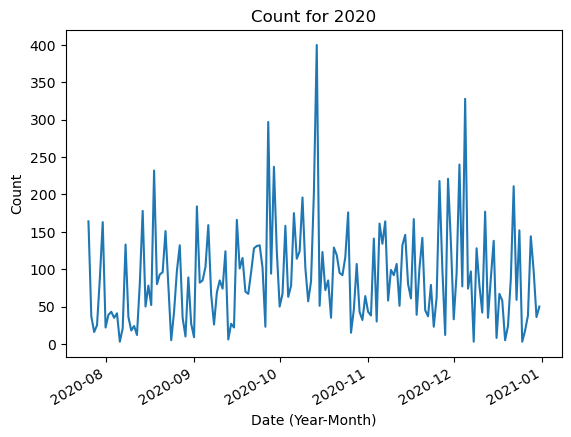

In [12]:
# Plots the number of occurrences for each month over 2020
df_bernie['Timestamp'].value_counts()[df_bernie['Timestamp'][(df_bernie['Timestamp'].dt.year == 2020)].unique()].plot(kind='line')

# Creates x-label, y-label, and title for graph
plt.xlabel('Date (Year-Month)')
plt.ylabel('Count')
plt.title('Count for 2020')

From the graph above we can see that the most events in 2020 appear to have happened in September. 

Text(0.5, 1.0, 'Song Count for 2021')

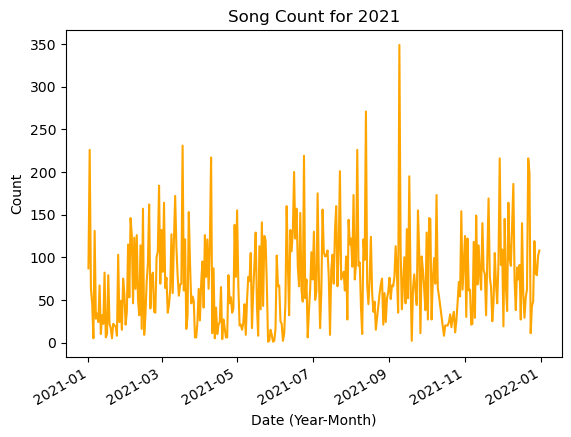

In [168]:
# Plots the number of occurrences for each month over 2021
df_bernie['Timestamp'].value_counts()[df_bernie['Timestamp'][(df_bernie['Timestamp'].dt.year == 2021)].unique()].plot(kind='line', color = 'orange')

# Creates x-label, y-label, and title for graph
plt.xlabel('Date (Year-Month)')
plt.ylabel('Count')
plt.title('Count for 2021')

From the graph for 2021 it looks like the most events happened in October. We can also see that the max number of events in 2021 is smaller than the max number in 2020, as the y-axis max value is smaller. 

Text(0.5, 1.0, 'Song Count for 2022')

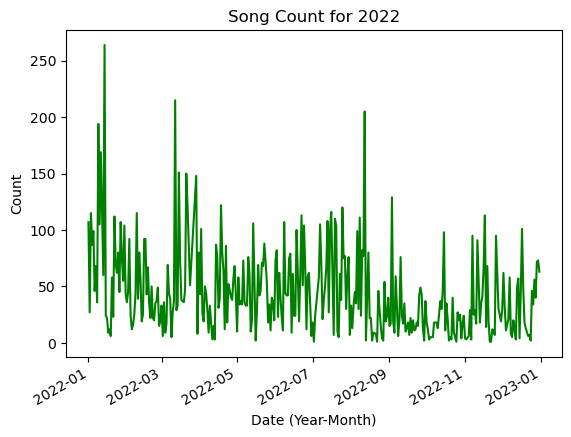

In [169]:
# Plots the number of occurrences for each month over 2022
df_bernie['Timestamp'].value_counts()[df_bernie['Timestamp'][(df_bernie['Timestamp'].dt.year == 2022)].unique()].plot(kind='line', color = 'green')

# Creates x-label, y-label, and title for graph
plt.xlabel('Date (Year-Month)')
plt.ylabel('Count')
plt.title('Count for 2022')

In 2022 the most events seem to have happened in the Janurary February time frame. However, we can see that there was a spike in events right before September. Once again, the max y-value is smaller for this year than the previous year. 

Text(0.5, 1.0, 'Song Count for 2023')

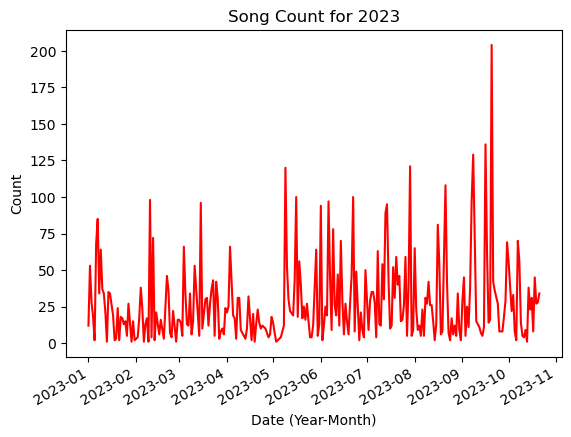

In [170]:
# Plots the number of occurrences for each month over 2023
df_bernie['Timestamp'].value_counts()[df_bernie['Timestamp'][(df_bernie['Timestamp'].dt.year == 2023)].unique()].plot(kind='line', color = 'red')

# Creates x-label, y-label, and title for graph
plt.xlabel('Date (Year-Month)')
plt.ylabel('Count')
plt.title('Count for 2023')

From the graph for 2023 we can see that the month witht he most events is October. Again, the max y-value is smaller than that of the prvious year. 

Text(0.5, 1.0, 'Song Count for 2020-2023')

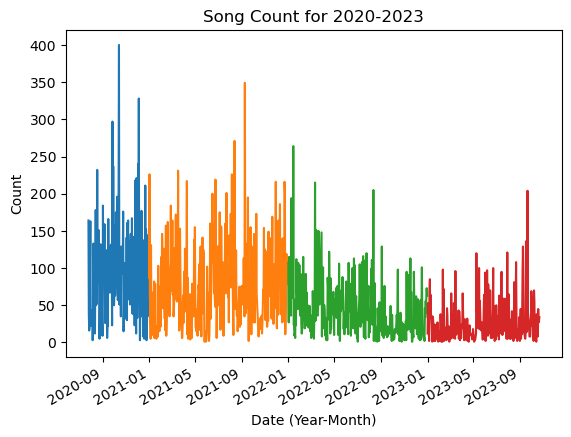

In [171]:
# Plots the number of occurrences for the entire time period of data
df_bernie['Timestamp'].value_counts()[df_bernie['Timestamp'][(df_bernie['Timestamp'].dt.year == 2020)].unique()].plot(kind='line')
df_bernie['Timestamp'].value_counts()[df_bernie['Timestamp'][(df_bernie['Timestamp'].dt.year == 2021)].unique()].plot(kind='line')
df_bernie['Timestamp'].value_counts()[df_bernie['Timestamp'][(df_bernie['Timestamp'].dt.year == 2022)].unique()].plot(kind='line')
df_bernie['Timestamp'].value_counts()[df_bernie['Timestamp'][(df_bernie['Timestamp'].dt.year == 2023)].unique()].plot(kind='line')

# Creates x-label, y-label, and title for graph
plt.xlabel('Date (Year-Month)')
plt.ylabel('Count')
plt.title('Count for 2020-2023')

In conjunction with the previous graphs, and the one above, we can see that over the past three years the number of events have been declining. However, it seems that there is normally a spike in events around September or October with some lulls in the early summer months and late spring months. 

From the questions I have ansered about the timestamp data, and the graphs I have made, I think the data is for some type of entertainment source, potentially a music service. Because some events occurred five days apart this leads me to beleive it is not location data. Although phones can get turned off or put into airplane mode, to not have your phone for five days would seem unlikely. 

My next thought was that it might be Netflix/tv service data because a lot of people seemed to request that sort of data from the jamboard we did in class. However, once I saw the max number of events in a day I decided agaisnt this. I figured Netflix probably collecetd time data for the start time or end time of watching a tv show or movie. As the max events in a day was 400 I thought it would be extremely unliekly that Bernie had somehow managed to watch 400 episodes of a tv show in one day. However, it is much easier to listen to that amount of songs, especially if the data is recording the songs that you skipped as song that were played. 

I also think it might be music data because of the trends the events follow. It seems like more events occurr during school periods than over breaks. I know that I personally listen to music more at school, because I want entertainment while I do my homework, than when I am on break and can spend more time doing other activites. I am unsure about how to factor in the decline of events of the years into my analysis, and the fact that 2020 had the most events was not very helpful as lots of people started doing more at home leisure actitives during this time period. 

I could make a better guess as to what the data was if I had the hour and time it was played. As the timestamp only included the date it was played, and not the time, I was unable to see how long each event lasted for. If the events were spaced roughly 2.5-3 minutes apart it might support my theory that this is music data. However, if all the events were 30 seconds apart I might rethink what the source of data is.   

## Part 3: Make a combined visualization

## Part 4: Analyze and visualize an additional element from  your personal data

The data I decided to use was my Amazon Music listening data. I decided that i wnated to answer the following questions:

1. What is the average amount of time I listen to a song? What is the longest and what is the shortest?

2. What is the most popular song that I skip? Do I skip this song more than I listen to it? 

The data for how long I listen to a song was given to me in milliseconds. To answer my first question I created a new column in my datafram where I converted the time from milliseconds to minutes. To do this I used the conversion (milliseconds/1000)/60. Once I created this new column (which I named Minutes) I used .max(), .mean(), and .min() to find the max, mean, and min time I spent listeng to a song. 

I found that the longest I have listened to a song is 23.55 minutes. The shortest time I have spent listening to a song is 0.0 minutes. I believe this is from me skipping songs right away or stopping them right when they start. The average time I spend listening to a song is 2.66 minutes. I feel like most of the songs I listen to are longer than 2.66 minutes but I do skip songs a lot, so taking that into account I think this statistic makes sense. 

For my next question I created a new dataframe that filtiered for songs that I skipped. Once I had this dataframe I used value_counts() to see the number of times I skipped certain songs. I found that my most skipped song is Hotel California by the Eagles. This made me curious about my top skip every year, so I then created new dataframes that filtered for songs that I skipped in specific years. So I made a dataframe for each year from 2018 to 2023. I found that the last two years Hotel California was my top skipped song and the two years before that, while not the most skipped song, it was in the top five. I then wanted to know if I skipped this song more than I listened to it. To do this I created a new dataframe that only had songs with Hotel California as the title. I then looked at the value counts for the termination reason and calculated the percent of time I skip the song and listen to it all the way through. I found that I skip the song 26% of the time and let it finish 39% of the time. So, to answer my original question, I do not skip the song more than I let it finish. 

For my visualization I decided to look at the hours I listen to music. I feel like there are specific times I tend to listen to music, because I have a pretty regular routine for my days, and wanted to see if when I though I listened to music the most matched the data. The graph below shows the song count for every hour over the time period of my data. 

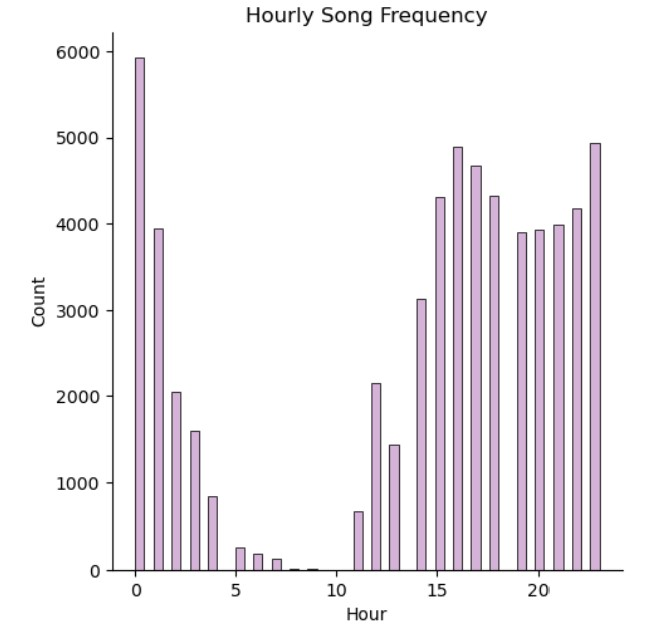

From the graph we can see that my most popular listening hour is 0:00. This is UTC time which translates to 4:00 pm PST. My next most popular time to listen to music is 23:00 UTC which is 3:00 pm PST. I was suprised to fin this out. This was initially suprising as I thought I would have listened to the most music in the mornings, probably around 9 or 10, because I always listen to music when I work out. However, upon further relfection I realized I tend to listen to music when I do homework or go on walks, which are thigns I tend to do around 3:00 or 4:00. 